# Braking Distance  Estimation using Simple Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BrakingDistance.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes


In [4]:
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


Text(0, 0.5, 'Distance')

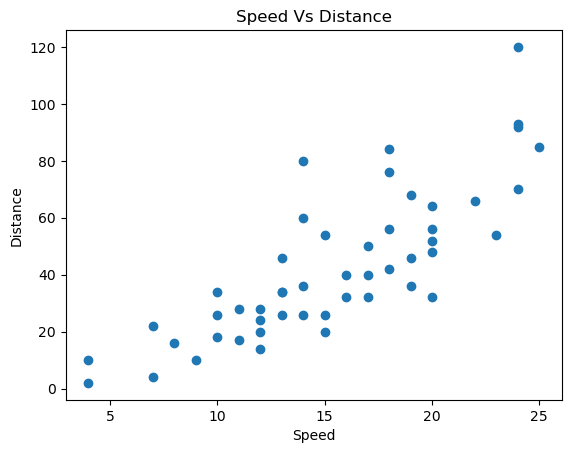

In [16]:
plt.scatter(df.speed,df.dist)
plt.title('Speed Vs Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')

In [17]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


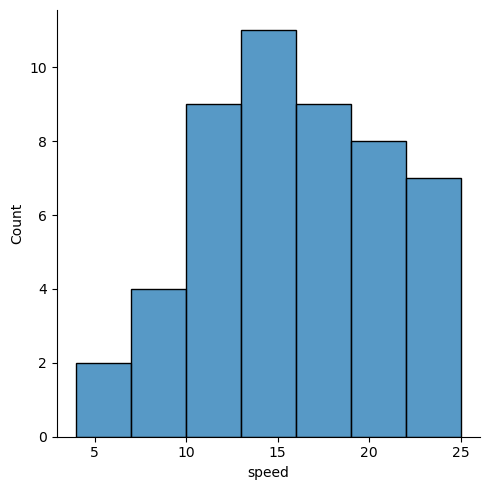

In [18]:
sns.displot(df.speed)

C:\Users\Sidd-pc\AppData\Local\Temp\ipykernel_11888\2816749509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.dist)


<Axes: xlabel='dist', ylabel='Density'>

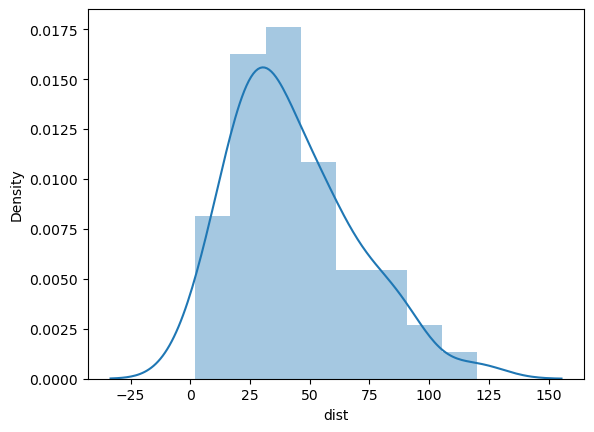

In [7]:
sns.distplot(df.dist)

In [8]:
xbar=np.mean(df.speed)
xbar

15.4

In [9]:
ybar=np.mean(df.dist)
ybar

42.98

In [10]:
beta1=np.sum((df.dist-ybar)*(df.speed-xbar))/np.sum((df.speed-xbar)**2)

In [11]:
beta1

3.932408759124088

In [19]:
beta0=ybar-beta1*xbar

In [20]:
beta0

-17.57909489051096

In [21]:
#y=-17.57 +3.93*x
df['pred']=beta0+beta1*df.speed

In [22]:
df

,speed,dist,pred
0,4,2,-1.849460
1,4,10,-1.849460
2,7,4,9.947766
3,7,22,9.947766
4,8,16,13.880175
5,9,10,17.812584
6,10,18,21.744993
7,10,26,21.744993
8,10,34,21.744993
9,11,17,25.677401


Text(0, 0.5, 'Distance')

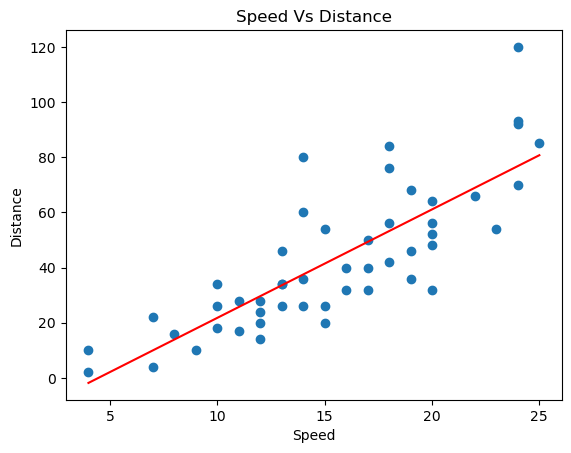

In [24]:
plt.scatter(df.speed,df.dist)
plt.plot(df.speed,df.pred, color='red')
plt.title('Speed Vs Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')

<Axes: xlabel='pred', ylabel='Density'>

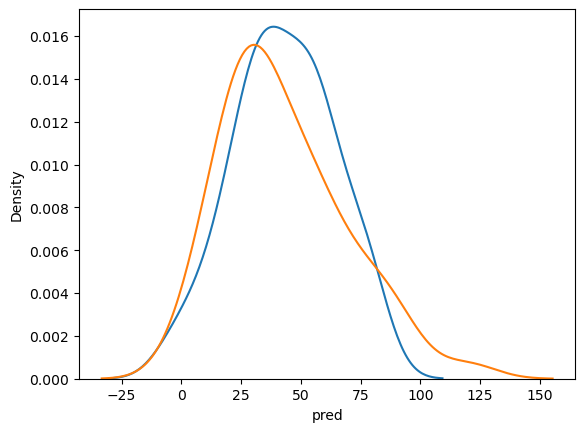

In [25]:
sns.kdeplot(df.pred)
sns.kdeplot(df.dist)

In [26]:
df['resid']=df.pred-df.dist

In [27]:
df

,speed,dist,pred,resid
0,4,2,-1.849460,-3.849460
1,4,10,-1.849460,-11.849460
2,7,4,9.947766,5.947766
3,7,22,9.947766,-12.052234
4,8,16,13.880175,-2.119825
5,9,10,17.812584,7.812584
6,10,18,21.744993,3.744993
7,10,26,21.744993,-4.255007
8,10,34,21.744993,-12.255007
9,11,17,25.677401,8.677401


<Axes: xlabel='resid', ylabel='Density'>

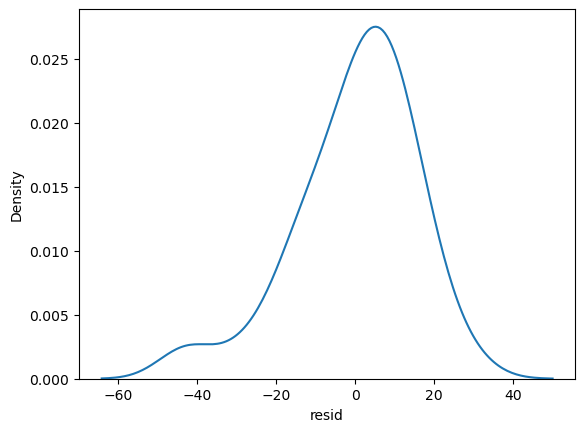

In [28]:
sns.kdeplot(df.resid)

In [29]:
#The End